# Resistivity of ground pathway

Figure 9 of the Kang et al. (2020) is generated using this notebook. 
To run the simulation, you need to run `near_surface_resistivity.py` in `python_scripts` folder.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os
os.chdir("./ground_pathway/")
datas = []
for file in np.sort(glob.glob("data*")):
    datas.append(np.load(file))
x = np.load("xyz.npy")

In [2]:
pico = 1e-12
area = 536.36
moment = pico * area

In [3]:
moment

5.3636e-10

In [4]:
resistivity_backgrounds = [1, 5, 20, 100, 340, 1000]

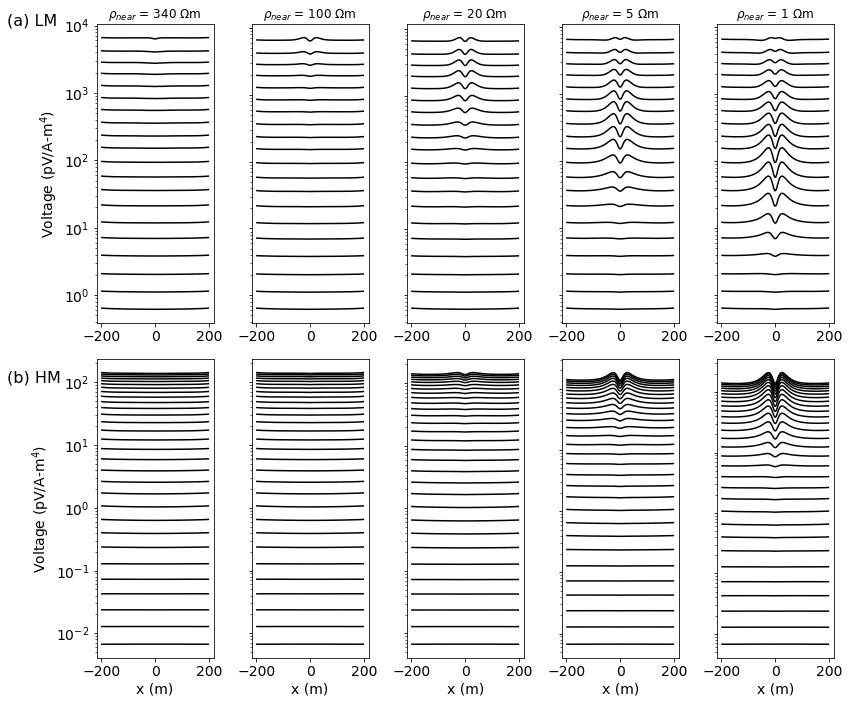

In [5]:
import matplotlib
matplotlib.rcParams['font.size'] = 14

cs_labels = [
    ('$\\rho_{near}$ = %i $\Omega$m') % (resistivity_background) for resistivity_background in resistivity_backgrounds
]
fig, axs = plt.subplots(2, 5, figsize=(12, 10))


for ii, jj in enumerate(range(4, -1, -1)):
    data = datas[jj].copy()
    data_hm = data[:100*30].reshape((30, 100), order='F').T
    data_lm = data[100*30:].reshape((20, 100), order='F').T  
#     out = axs[0,ii].semilogy(x[:,0], -data_lm_ref/moment, 'k--', ms=3, lw=1, alpha=0.7)
#     if ii==2:
#         axs[0, ii].legend(("0 m", ), bbox_to_anchor=(1,1))        
    out = axs[0,ii].semilogy(x[:,0], -data_lm/moment, 'k-', ms=3)            
    out = axs[1,ii].semilogy(x[:,0], -data_hm/moment, 'k-', ms=3)    
#     out = axs[1,ii].semilogy(x[:,0], -data_hm_ref/moment, 'k--', ms=3, lw=1, alpha=0.7)    
  
    
    if ii > 0:
        axs[0,ii].set_yticklabels([])
        axs[1,ii].set_yticklabels([])        
    else:
        axs[0,ii].text(-550, 1e4, "(a) LM", fontsize=16)
        axs[1,ii].text(-550, 1e2, "(b) HM", fontsize=16)        
    axs[0,ii].set_title(cs_labels[jj], fontsize=12)
    axs[1,ii].set_xlabel("x (m)")

axs[0, 0].set_ylabel("Voltage (pV/A-m$^4$)")
axs[1, 0].set_ylabel("Voltage (pV/A-m$^4$)")
plt.tight_layout()
fig.savefig('../figures/figure-9', dpi=200)